In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("spotify-charts.csv")

In [4]:
data.head(5)

,Unnamed: 0,Position,Track Name,Streams,Chart Start Date,Chart End Date,Album Name,Release Date,Artist,Features,Song Duration(ms),Explicit,Url
0,0,1,Easy On Me by Adele,"57,081,735",2021-10-22,2021-10-29,Easy On Me,2021-10-14,Adele,None,224694,False,https://open.spotify.com/track/0gplL1WMoJ6iYaP...
1,1,2,STAY (with Justin Bieber) by The Kid LAROI,"43,772,708",2021-10-22,2021-10-29,F*CK LOVE 3: OVER YOU,2021-07-23,The Kid LAROI,Justin Bieber,141805,True,https://open.spotify.com/track/5PjdY0CKGZdEuoN...
2,2,3,INDUSTRY BABY (feat. Jack Harlow) by Lil Nas X,"38,131,363",2021-10-22,2021-10-29,MONTERO,2021-09-17,Lil Nas X,Jack Harlow,212352,True,https://open.spotify.com/track/5Z9KJZvQzH6PFmb...
3,3,4,Heat Waves by Glass Animals,"30,071,945",2021-10-22,2021-10-29,Dreamland (+ Bonus Levels),2020-08-06,Glass Animals,None,238805,False,https://open.spotify.com/track/02MWAaffLxlfxAU...
4,4,5,MONEY by LISA,"27,961,856",2021-10-22,2021-10-29,LALISA,2021-09-10,LISA,None,168227,False,https://open.spotify.com/track/7hU3IHwjX150XLo...


# Cleaning Data

In [5]:
def strip_function(x):
    if(type(x)!=int and type(x)!=bool):
        return x.strip()
    return x

In [6]:
lists = data.columns.to_list()
for i in lists:
    data[i] = data[i].apply(lambda x: strip_function(x))

In [48]:
data["Song Duration(min)"] = data["Song Duration(ms)"].apply(lambda x: x*1.66667e-5)

# EDA

### 1. Find top songs and artists who have charted the most
We need to find the top songs and artists who charted the most in 2021 yet. <br>
<b>As an added activity, I explored the disparity in the list of Most charted Tracks and Artists. </b>

In [7]:
track_count_series =  data["Track Name"].value_counts()
# album_count_series = data["Album Name"].value_counts()
artist_count_series = data["Artist"].value_counts()

print(track_count_series,"\n\n",artist_count_series)

Levitating (feat. DaBaby) by Dua Lipa                          41
Blinding Lights by The Weeknd                                  34
drivers license by Olivia Rodrigo                              33
MONTERO (Call Me By Your Name) by Lil Nas X                    31
Peaches (feat. Daniel Caesar & Giveon) by Justin Bieber        29
                                                               ..
HOLIDAY by Lil Nas X                                            1
No Friends In The Industry by Drake                             1
Solid (feat. Drake) by Young Stoner Life, Young Thug, Gunna     1
9 5 . s o u t h by J. Cole                                      1
Jonah by Kanye West                                             1
Name: Track Name, Length: 169, dtype: int64 

 Olivia Rodrigo       135
Doja Cat              77
The Weeknd            75
Bad Bunny             58
Justin Bieber         56
                    ... 
Trippie Redd           1
Lorde                  1
Lizzo                  1
Lo

In [8]:
print("Times Dua Lipa charted:- ", artist_count_series["Dua Lipa"])

Times Dua Lipa charted:-  44


In [9]:
data[(data["Artist"]=="Dua Lipa")]["Track Name"].value_counts()


Levitating (feat. DaBaby) by Dua Lipa    41
We're Good by Dua Lipa                    3
Name: Track Name, dtype: int64

### Conclusion <br>
1. From the above, we saw how even though Levitating by Dua Lipa has charted the most amount of times in 2021, we don't see her in the top 5 Artists List. This is a clear indication of though, Dua Lipa has the most amount of time in Top 30. She has only 1-2 good songs from her album which helped her peak.
<br>
<b>This can mean that her song had a very high re-playability factor to it.</b>
<br>
2. We observe the same for other artists like Lil Nas X.
<br>
3. Artists like Weekend, Olivia Rodrigo and Doja Cat do not face the same issue and are on the top 5 of the artists as well as tracks list. Showing that they had more songs in their album which gained traction and at the same time had a high re-playability factor.
<br>
4. Finally we see artists like Justin Bieber and Bad Bunny who do not feature in top 5 of tracks list but evidently have a lot of songs that did chart.


### <br>

### 2. Find data of songs of top 5 charted artists
We will now see the data of the songs of the top 5 charted artists. 

In [10]:
artists_5 = artist_count_series.index.tolist()[:5]

for i in artists_5:
    count_data = data[data["Artist"]==i]["Track Name"].value_counts()
    print(count_data,"\n\nNumber of Distinct Tracks",len(count_data),"\n\n")


drivers license by Olivia Rodrigo                 33
good 4 u by Olivia Rodrigo                        24
traitor by Olivia Rodrigo                         22
deja vu by Olivia Rodrigo                         21
happier by Olivia Rodrigo                         11
favorite crime by Olivia Rodrigo                   9
brutal by Olivia Rodrigo                           5
jealousy, jealousy by Olivia Rodrigo               4
enough for you by Olivia Rodrigo                   3
1 step forward, 3 steps back by Olivia Rodrigo     2
hope ur ok by Olivia Rodrigo                       1
Name: Track Name, dtype: int64 

Number of Distinct Tracks 11 


Kiss Me More (feat. SZA) by Doja Cat    29
Streets by Doja Cat                     15
Need to Know by Doja Cat                14
Woman by Doja Cat                       12
Ain't Shit by Doja Cat                   4
You Right by Doja Cat, The Weeknd        3
Name: Track Name, dtype: int64 

Number of Distinct Tracks 6 


Blinding Lights by The Weeknd 

#### As Olivia Rodrigo and Justin Bieber have the highest number of charted songs. Let us explore those 2 more. 

1. Olivia Rodrigo

In [11]:
olivia_charts = data[data["Artist"]=="Olivia Rodrigo"]["Track Name"].value_counts().index.tolist()

In [12]:
olivia_rank_dict = {}
for i in olivia_charts:
    olivia_rank_dict[i] = {}
    olivia_rank_dict[i]["ranks"] = []
    olivia_rank_dict[i]["date"] = []
    olivia_rank_dict[i]["ranks"] = data[data["Track Name"]==i]["Position"].values
    olivia_rank_dict[i]["date"] = data[data["Track Name"]==i]["Chart Start Date"].values


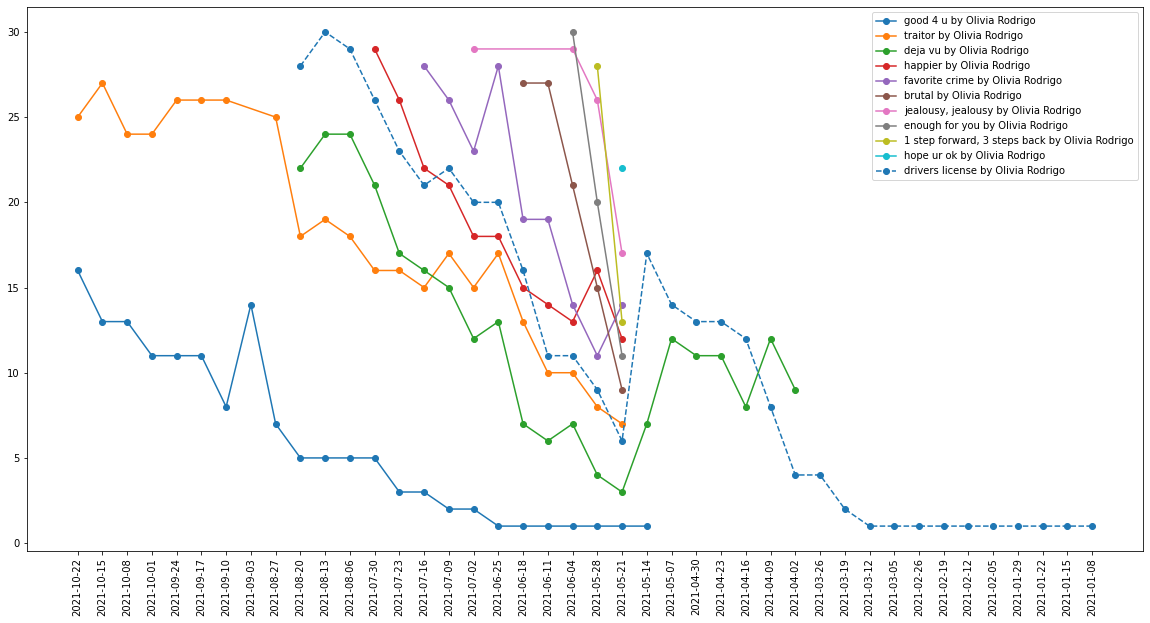

In [13]:
plt.figure(figsize=(20,10))
check = range(1,11)
add = 0
for i in olivia_rank_dict:
    if(add in check):
        x = olivia_rank_dict[i]["date"]
        y = olivia_rank_dict[i]["ranks"]
        
        plt.plot(x,y,"-o",label=i)
    add = add + 1

x1 = olivia_rank_dict['drivers license by Olivia Rodrigo']["date"]
y1 = olivia_rank_dict['drivers license by Olivia Rodrigo']["ranks"]
plt.plot(x1,y1,"--o",label="drivers license by Olivia Rodrigo")



plt.legend()
plt.xticks(rotation=90)
plt.show()

In [22]:
data[(data["Artist"]=="Olivia Rodrigo") & (data["Position"]<=15)]["Track Name"].value_counts()

good 4 u by Olivia Rodrigo                        23
drivers license by Olivia Rodrigo                 22
deja vu by Olivia Rodrigo                         15
traitor by Olivia Rodrigo                          7
happier by Olivia Rodrigo                          4
favorite crime by Olivia Rodrigo                   3
brutal by Olivia Rodrigo                           2
1 step forward, 3 steps back by Olivia Rodrigo     1
enough for you by Olivia Rodrigo                   1
Name: Track Name, dtype: int64

#### Conclusion <br>
Olivia completely dominates the first position for several weeks with her 2 songs, 
<ol>
<li>Drivers License</li>
<li>Good 4 U</li>
</ol>
Not only that, many of her songs from her album have been in top-15. <br>
Infact 10/11 Songs have actually been in the top 15. 
<br><br>
Another interesting factor we notice is that, her songs remain on the charts for a very long time(8 months). 
<br>
A possible factor could be that those songs are quite hit on social media platforms like tiktok and instagram reels and hence tend to be trending for long.

2. Justin Bieber

In [14]:
justin_charts = data[data["Artist"]=="Justin Bieber"]["Track Name"].value_counts().index.tolist()


In [17]:
justin_rank_dict = {}
for i in justin_charts:
    justin_rank_dict[i] = {}
    justin_rank_dict[i]["ranks"] = []
    justin_rank_dict[i]["date"] = []
    justin_rank_dict[i]["ranks"] = data[data["Track Name"]==i]["Position"].values
    justin_rank_dict[i]["date"] = data[data["Track Name"]==i]["Chart Start Date"].values


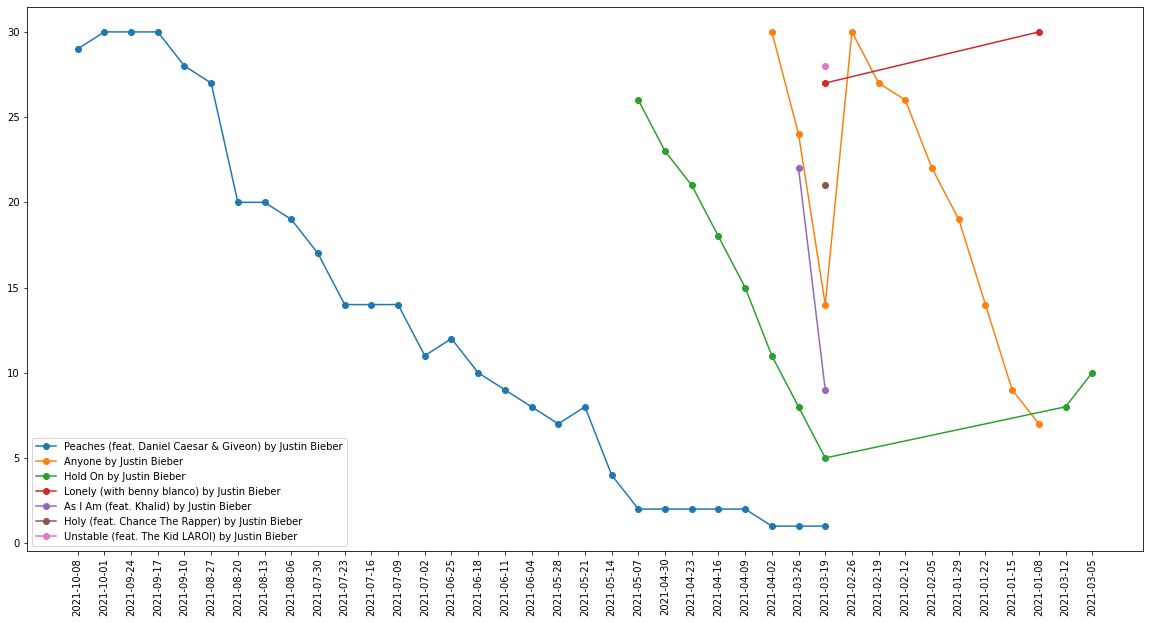

In [19]:
plt.figure(figsize=(20,10))
for i in justin_rank_dict:
    x = justin_rank_dict[i]["date"]
    y = justin_rank_dict[i]["ranks"]
    
    plt.plot(x,y,"-o",label=i)


plt.legend()
plt.xticks(rotation=90)
plt.show()

#### Conclusion
Similar to Olivia, we see that Justin Bieber's song Peaches, has stayed on the charts for 7 months and going. This can also be attributed to the fact that Peaches was a fan favorite and trending song on TikTok as well as Reels.
<br><br>
An interesting observation from the above 2 charts was that, it was Justin Bieber's Peaches which dethroned Olivia Rodrigo's Drivers License!

##

### 3. Explore the chart positions of the top 5 tracks which were on the charts the longest.
So here we will see the chart position line graph for the top 5 tracks which were in top 30 the longest, and try to infer some conclusion. 

In [32]:
tracks_5 = track_count_series.index.tolist()[:5]
tracks_5

['Levitating (feat. DaBaby) by Dua Lipa',
 'Blinding Lights by The Weeknd',
 'drivers license by Olivia Rodrigo',
 'MONTERO (Call Me By Your Name) by Lil Nas X',
 'Peaches (feat. Daniel Caesar & Giveon) by Justin Bieber']

In [33]:
tracks_rank_dict = {}
for i in tracks_5:
    tracks_rank_dict[i] = {}
    tracks_rank_dict[i]["ranks"] = []
    tracks_rank_dict[i]["date"] = []
    tracks_rank_dict[i]["ranks"] = data[data["Track Name"]==i]["Position"].values
    tracks_rank_dict[i]["date"] = data[data["Track Name"]==i]["Chart Start Date"].values

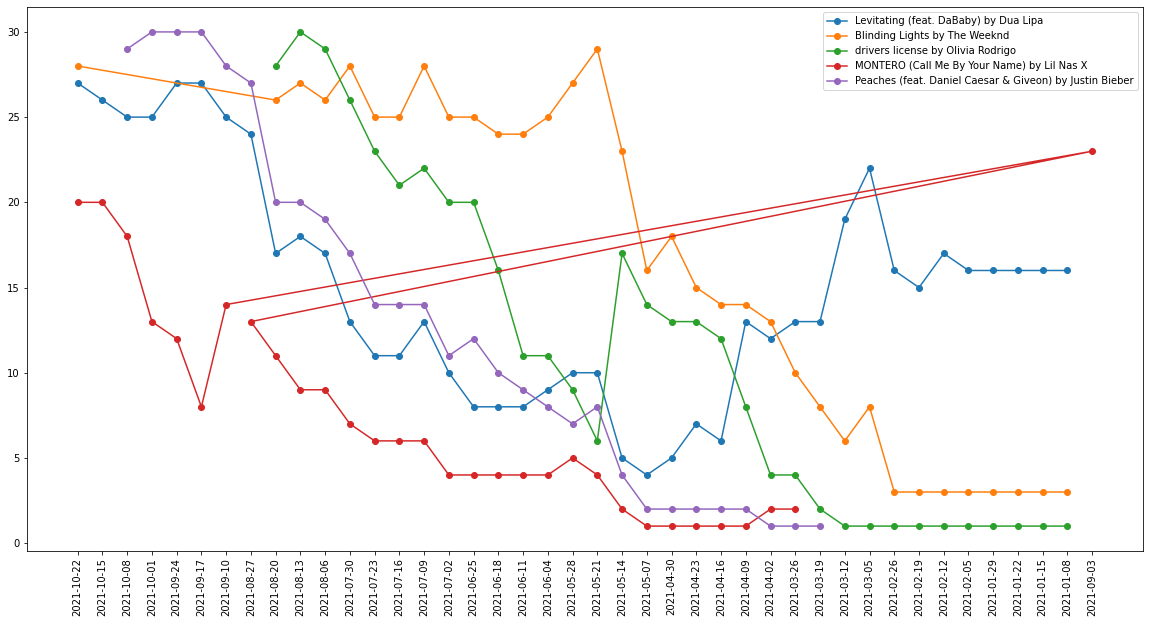

In [43]:
plt.figure(figsize=(20,10))
for j in (tracks_rank_dict):
    x = tracks_rank_dict[j]["date"]
    y = tracks_rank_dict[j]["ranks"]
    
    plt.plot(x,y,"-o",label=j)


plt.legend()
plt.xticks(rotation=90)
plt.show()

### Conclusion 
Initial observation here was to see which tracks dethrone which from the top spot, as well as determine for how long they reign over the charts. But we are greeted by another interesting and unintuitive observation!

### Unituitive Observation:
We can see here songs like Blinding Lights and Levitating both at the 1,2 highest time on charts respectively. But we can see that though they have been on the charts the longest. They never once got into the top-3 of the charts. 
<br>
Major shock comes from Levitating which has been on the charts for every single week for 10 months straight and still never broke to the top 5 of the charts. 
<br><br>
A possible factor to it can be the song always being in competition with other songs and never really ever being able to compete well enough to overcome them. 
<br>
We see that it reaches the 4th position months after its release! Which also in quite unintuitive because most songs usually reach the top of the charts when it is released and then progressively move down the ranks. 
<br>
A possible explanation can again be explained by the trend setters of social media, like TikTok and Reels.

##

### 4. Does rank also depend on the duration of each song?
How does the duration of a song affect its standing in the charts? Are all songs which reach top spots are those in a particular duration frame? 

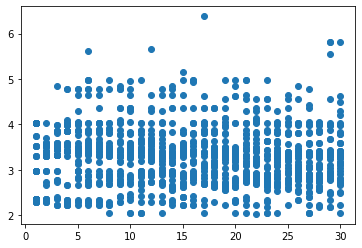

In [51]:
x = data["Position"].values
y = data["Song Duration(min)"].values
plt.scatter(x,y)
plt.show()

In [57]:
data[data["Song Duration(min)"]>=4]

,Unnamed: 0,Position,Track Name,Streams,Chart Start Date,Chart End Date,Album Name,Release Date,Artist,Features,Song Duration(ms),Explicit,Url,Song Duration(min)
9,9,10,Pepas by Farruko,"25,389,829",2021-10-22,2021-10-29,La 167,2021-10-01,Farruko,None,287120,True,https://open.spotify.com/track/2B4GHvToeLTOBB4...,4.785343
22,22,23,Happier Than Ever by Billie Eilish,"16,337,007",2021-10-22,2021-10-29,Happier Than Ever,2021-07-30,Billie Eilish,None,298899,True,https://open.spotify.com/track/4RVwu0g32PAqgUi...,4.981660
29,29,30,Way 2 Sexy (with Future & Young Thug) by Drake,"12,916,861",2021-10-22,2021-10-29,Certified Lover Boy,2021-09-03,Drake,"Future,Young Thug",257604,True,https://open.spotify.com/track/0k1WUmIRnG3xU6f...,4.293409
38,38,9,Pepas by Farruko,"25,757,960",2021-10-15,2021-10-22,La 167,2021-10-01,Farruko,None,287120,True,https://open.spotify.com/track/2B4GHvToeLTOBB4...,4.785343
50,50,21,Happier Than Ever by Billie Eilish,"17,201,321",2021-10-15,2021-10-22,Happier Than Ever,2021-07-30,Billie Eilish,None,298899,True,https://open.spotify.com/track/4RVwu0g32PAqgUi...,4.981660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1174,1174,5,Good Days by SZA,"20,809,013",2021-01-22,2021-01-29,Good Days,2020-12-25,SZA,None,279204,True,https://open.spotify.com/track/3YJJjQPAbDT7mGp...,4.653409
1200,1200,1,drivers license by Olivia Rodrigo,"80,764,045",2021-01-15,2021-01-22,SOUR,2021-05-21,Olivia Rodrigo,None,242013,True,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,4.033558
1206,1206,7,Good Days by SZA,"20,190,575",2021-01-15,2021-01-22,Good Days,2020-12-25,SZA,None,279204,True,https://open.spotify.com/track/3YJJjQPAbDT7mGp...,4.653409
1230,1230,1,drivers license by Olivia Rodrigo,"65,873,080",2021-01-08,2021-01-15,SOUR,2021-05-21,Olivia Rodrigo,None,242013,True,https://open.spotify.com/track/7lPN2DXiMsVn7XU...,4.033558


### Conclusion 
Here one thing to note is that songs are repeated. Meaning many songs in the top position are also those on the later positions. 
<br>
But we can still draw inference that 3~4 mins is the sweet spot for songs to be on the top of the chart. 
<br>
As we go down the charts the we see that all songs from 2~4 mins are still appreciated.
<br><br>
We can therefore somewhat say that below 4 minutes is the essential time duration for a song to not be too much for the listeners. 
<br><br>
Infact only 2 songs in top 5 were significantly over the 4 mins mark.